## Homework-6
### CSC-722: Machine Learning Fundamentals
### Md Hafizur Rahman

## Problem Statement:
### Compress the image 'test.jpg' with 1,5,10,25, and 50 main components (Rank of the image) by using Singular-Value Decomposition. Explain your observation. 
#### Note: Please submit your code and your report in one pdf file. Also, submitt the Jupyer notebook separately. Please do not zip your files. 

### Singular-value decomposition:
#### Theory:
Every $m × n$ matrix $A$ can be transformed into the form

$A=UDV^T$

The matrices $U$, $D$, and $V$ have the following properties:

- $U$ and $V$ are orthogonal matrices where $U$ is the $m \times m$ matrix and $V$ is the $n \times n$ matrix.

- $D$ is a diagonal matrix where $D$ is the $m \times n$ matrix.

We can find the values of $U$, $D$, and $V$ from $A$ by using the follwing formulas: 

$U_{m\times m}=
\begin{bmatrix}
\vec{u_1} \vec{u_2} ... \vec{u_m}
\end{bmatrix}
$

where, $\vec{u_1}, \vec{u_2}, ..., \vec{u_m}$ are the column vectors of $A$ for all eigenvalues. We can find these values by using $(A-\sigma_k I)\vec{u_k})=0$, here $k=1,2,...$ is the number of eigenvalues of A.

$D_{m\times n}=
\begin{bmatrix}
\sigma_1 & 0 & 0 & ..\\
0 & \sigma_2 & 0 & ..\\
.. & .. & .. & ..
\end{bmatrix}
$

where, $\sigma{1}, \sigma{2} ... \sigma{n}$ are the eigenvalues of $A$. We can find these values using $det(A-\sigma_k I)=0$, here, $I$ is the identity matrix. 

$V_{n\times n}=
\begin{bmatrix}
\vec{v_1} \vec{v_2} ... \vec{v_n}
\end{bmatrix}
$

where, $\vec{v_1}, \vec{v_2}, ..., \vec{v_m}$ are the row vectors of $A$ for all eigunvalues. We can find these values from the transpose matrix of $\vec{u_1}, \vec{u_2}, ..., \vec{u_m}$.

The columns of  $A$ can be written as:

$\vec{a_i}=\vec{u_1}\sigma_1\vec{v_{1,i}}+\vec{u_2}\sigma_2\vec{v_{2,i}}+...$


We implement the above theorem in python to compress an image with the different rank of the given image and compare the results. 

In [36]:
# importing required libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

Size(dimension):  (2048, 1727)


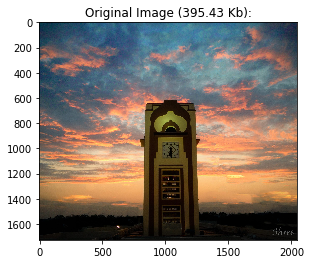

In [38]:
#load and plot an input image(RGB) 
path = 'test.jpg'
img = Image.open(path)
s = float(os.path.getsize(path))/1000
print("Size(dimension): ",img.size)
plt.title("Original Image (%0.2f Kb):" %s)
plt.imshow(img)

Actual main component(Rank) of the original image:  1727


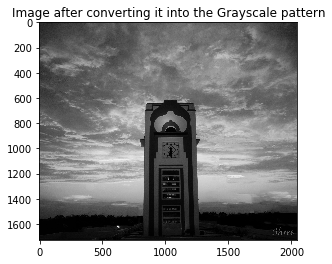

In [39]:
#Converting the RGB image into grayscale image
imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
print("Actual main component(Rank) of the original image: ", np.linalg.matrix_rank(imgmat))
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

In [40]:
print("After compression: ")
#singluar value decomposition
U, S, Vt = np.linalg.svd(imgmat) 

After compression: 


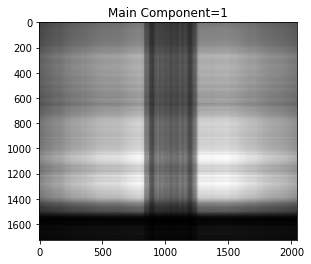

Actual main component(Rank) of the compressed image:  1
---------------------------------------------------


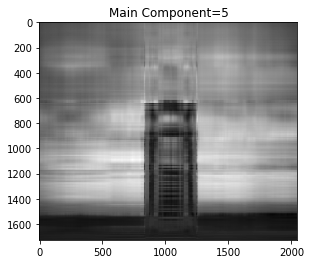

Actual main component(Rank) of the compressed image:  5
---------------------------------------------------


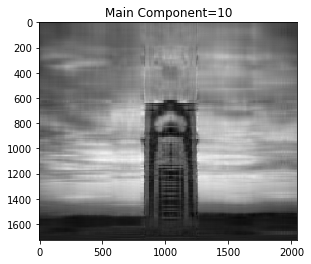

Actual main component(Rank) of the compressed image:  10
---------------------------------------------------


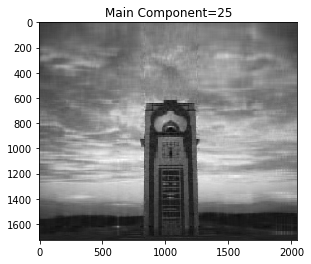

Actual main component(Rank) of the compressed image:  25
---------------------------------------------------


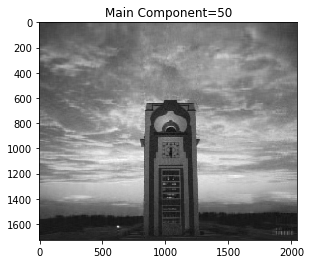

Actual main component(Rank) of the compressed image:  50
---------------------------------------------------


In [41]:
#Compression of the original image by reducing the rank into 1, 5, 10, 25, and 50
for i in [1, 5, 10, 25, 50]:
    reconsting = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i, :])
    plt.imshow(reconsting, cmap='gray');
    title = ("Main Component=%s"%i) 
    plt.title(title)
    plt.show()
    print("Actual main component(Rank) of the compressed image: ", np.linalg.matrix_rank(reconsting))
    print("---------------------------------------------------")

### Observation:
When we reduced the rank of the original image into 1, the output image as shown in above. It is hard to see with only one singular value and singular vector. Then we increased the rank of the original image into 5, 10, 25, and 50. For the rank 5 and 10, the output images are not good to understand the object. However, for the rank 25, the output image shows promising results prospectively previous outputs. But, still, the output image shows some distortion in some areas. Finally, for rank 50, the output image and the original image are almost the same to the naked eye.